# Sentiment Analysis with Naive Bayes

In [176]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import BernoulliNB

In [177]:
yelp_path = 'textdata/yelp_labelled.txt'
yelp_raw = pd.read_csv(yelp_path, delimiter='\t', header=None)
yelp_raw.columns = ['review', 'positive']
yelp_raw.head()

,review,positive
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [178]:
words = ['good', 'great', 'bad', 'awful', 'not', 'angry', 'happy', 'glad', 'thrilled', 'sucks', 'recommend', 'wow', 'love', 'hate', 'nasty', 'service', 'food', 'atmosphere', 'loud', 'delicious', 'tasty', 'gross']
for word in words:
    yelp_raw[str(word)] = yelp_raw.review.str.contains(str(word), case=False)
    


In [179]:
yelp_raw.head()

,review,positive,good,great,bad,awful,not,angry,happy,glad,...,love,hate,nasty,service,food,atmosphere,loud,delicious,tasty,gross
0,Wow... Loved this place.,1,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
1,Crust is not good.,0,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Not tasty and the texture was just nasty.,0,False,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
3,Stopped by during the late May bank holiday of...,1,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,The selection on the menu was great and so wer...,1,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


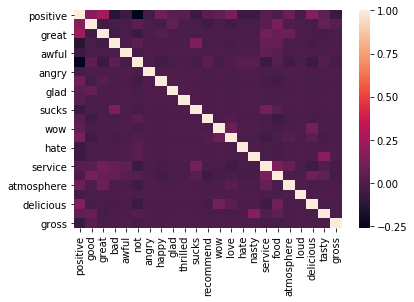

In [180]:
sns.heatmap(yelp_raw.corr())

In [181]:
data = yelp_raw[words]
target = yelp_raw['positive']

bnb = BernoulliNB()

bnb.fit(data, target)

y_pred = bnb.predict(data)

(target == y_pred).sum()/data.shape[0]

0.674

Our first attempt yields 67% accuracy. Let's see how we do using the same model on Amazon reviews.

In [182]:
amazon_path = 'textdata/amazon_cells_labelled.txt'
amazon_raw = pd.read_csv(amazon_path, delimiter='\t', header=None)
amazon_raw.columns = ['review', 'positive']
amazon_raw.head()

,review,positive
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


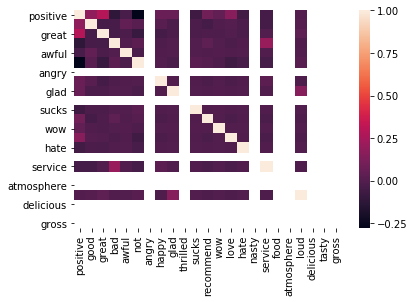

In [183]:
for word in words:
    amazon_raw[str(word)] = amazon_raw.review.str.contains(str(word), case=False)

sns.heatmap(amazon_raw.corr())

We see a lot more empty space. It makse sense that words like "delicious," and "tasty," that would be common in our yelp data set would not be found in Amazon reviews.

In [184]:
data_az = amazon_raw[words]
target_az = amazon_raw['positive']

y_pred_az = bnb.predict(data_az)

(target_az == y_pred_az).sum()/data_az.shape[0]


0.68

68% Accuracy, about the same as the data set the model was trained on. That's really encouraging. Let's see how well it does when trained on Amazon data.

In [185]:
bnb = BernoulliNB()
bnb.fit(data_az, target_az)
y_pred_az = bnb.predict(data_az)
(target_az == y_pred_az).sum()/data_az.shape[0]

0.689

Better, as we would expect.

The next set of code uses the top 100 most used words from our data, and uses those as our features.

In [186]:
allwords = []

for review in yelp_raw.review:
    review = review.lower()
    review = review.replace('.','').replace('!','').replace(',','').replace('?','').replace(':','').replace(';','')
    review = review.replace('"','').replace("'",'').replace('-','').replace('(','').replace(')','').replace('&','and')
    review = review.replace('$','').replace("%",'').replace('*','').replace('+','').replace('/','')
    allwords += review.split()


In [187]:
commonwords = list(pd.Series(allwords).value_counts().index[:100])

In [188]:
yelp_raw2 = pd.read_csv(yelp_path, delimiter='\t', header=None)
yelp_raw2.columns = ['review', 'positive']
for word in commonwords:
    yelp_raw2[str(word)] = yelp_raw2.review.str.contains(str(word), case=False)

data = yelp_raw2[commonwords]
target = yelp_raw2['positive']

bnb = BernoulliNB()

bnb.fit(data, target)

y_pred = bnb.predict(data)

(target == y_pred).sum()/data.shape[0]

0.729

In [189]:
amazon_raw = pd.read_csv(amazon_path, delimiter='\t', header=None)
amazon_raw.columns = ['review', 'positive']

for word in commonwords:
    amazon_raw[str(word)] = amazon_raw.review.str.contains(str(word), case=False)

data_az = amazon_raw[commonwords]
target_az = amazon_raw['positive']

y_pred_az = bnb.predict(data_az)

(target_az == y_pred_az).sum()/data_az.shape[0]

0.673

So while we were better able to fit the training data, we didn't actually improve our predictive power out of sample.

In [190]:
commonwords = list(pd.Series(allwords).value_counts().index[:400])

yelp_raw3 = pd.read_csv(yelp_path, delimiter='\t', header=None)
yelp_raw3.columns = ['review', 'positive']
for word in commonwords:
    yelp_raw3[str(word)] = yelp_raw3.review.str.contains(str(word), case=False)

data = yelp_raw3[commonwords]
target = yelp_raw2['positive']

bnb = BernoulliNB()

bnb.fit(data, target)

y_pred = bnb.predict(data)

(target == y_pred).sum()/data.shape[0]

0.835

In [191]:
amazon_raw = pd.read_csv(amazon_path, delimiter='\t', header=None)
amazon_raw.columns = ['review', 'positive']

for word in commonwords:
    amazon_raw[str(word)] = amazon_raw.review.str.contains(str(word), case=False)

data_az = amazon_raw[commonwords]
target_az = amazon_raw['positive']

y_pred_az = bnb.predict(data_az)

(target_az == y_pred_az).sum()/data_az.shape[0]

0.734

In [192]:
print('words with correlation above 0.1: ' + str(sum(yelp_raw3.corr().iloc[0,1:]>.1)))
print('words with correlation above 0.1: ' + str(sum(yelp_raw3.corr().iloc[0,1:]>.05)))
print('words with correlation above 0.1: ' + str(sum(yelp_raw3.corr().iloc[0,1:]>.03)))
print('words with correlation above 0.1: ' + str(sum(yelp_raw3.corr().iloc[0,1:]>.01)))

words with correlation above 0.1: 15
words with correlation above 0.1: 56
words with correlation above 0.1: 98
words with correlation above 0.1: 149
